![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [101]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [102]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("D:\Clustering_MeLi\src\data\processed\data_embedding_numeric.csv")


In [103]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
import numpy as np
import pandas as pd



In [104]:
# Separo la data de validacion que son los registros que tienen null,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)

(0, 13)


In [105]:
#retiro los nulls del dataframe fuente
df_270=df_270[df_270['Kmeans'].isnull()==False]
print(df_270[df_270['Kmeans'].isnull()]) # Valido que ninguno no tengan datos con valores en la etiqueta
df_270['Kmeans'] =df_270['Kmeans'].astype(str)
df_270['AgC'] =df_270['AgC'].astype(str)
df_270.head(10)
df_val = df_270.tail(50) # extraigo 50 registros pa validar
df_270 = df_270.iloc[:-50,:]
df_270.shape

Empty DataFrame
Columns: [Unnamed: 0, seller_nickname, stock, price, regular_price, Products, total_amount, regular_total_amount, Kmeans, AgC, mix, tokens, embedding]
Index: []


(750, 13)

In [106]:
df_270['Kmeans']=df_270['Kmeans'].astype(int)

In [107]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=0.2,random_state=13
)

df_270['Kmeans'].value_counts()

Kmeans
0    190
2    189
3    189
1    182
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

## RANDOM-FOREST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        34

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



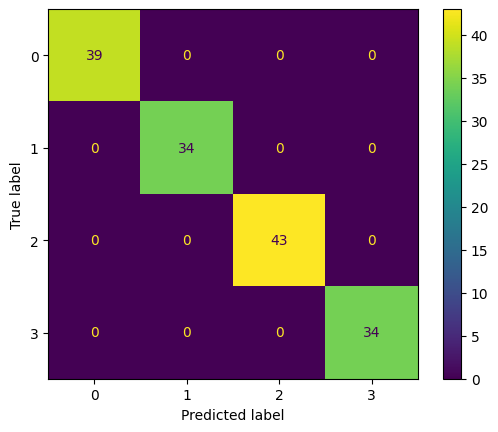

In [108]:
# Modelado, Entrenamiento, Evaluacion
RFclf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
RFclf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones
probas = clf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        34

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



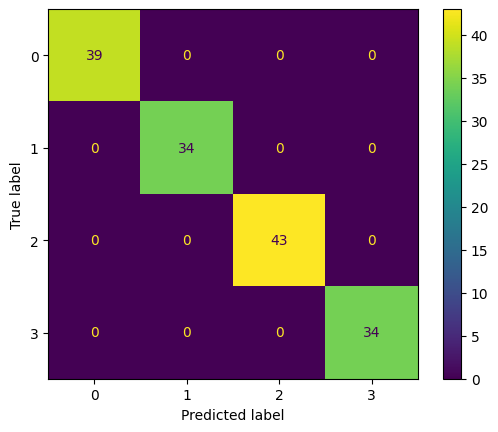

In [109]:
# Modelado, Entrenamiento, Evaluacion
SVCclf = SVC() #iniciamos el modelo
SVCclf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        34

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



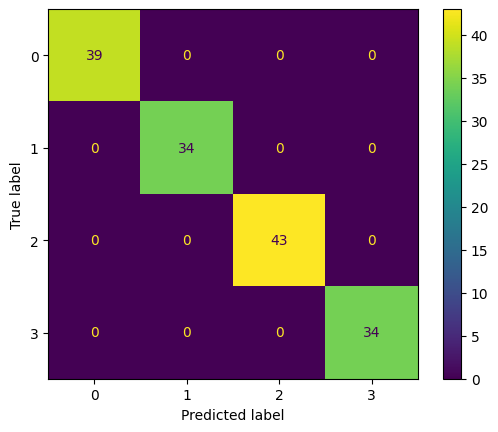

In [110]:
# Modelado, Entrenamiento, Evaluacion
XGclf = XGBClassifier() #iniciamos el modelo
XGclf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion

#### Los resultados con la data sin variables categoricas (Clustering v2) en el modelado todos son perfectos con un valor de accuracy 1. y como vemos mas adelante se obtiene un accuracy de 70% un valor muy bueno, esto nos muestra que tenemos Overfit. teniendo en cuenta que no se han modificado hyperparametros de los modelos seleccionados.

<class 'numpy.str_'>
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.68      0.72      0.70        18
           2       0.80      0.73      0.76        11
           3       0.45      0.45      0.45        11

    accuracy                           0.70        50
   macro avg       0.71      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



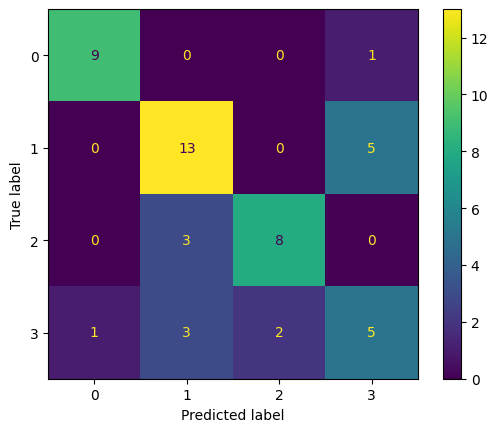

In [111]:
# AHora haremos las validacion con el set validacion df_val de 50 registros, registros nos vistos en el entrenamiento escogeremos solo un modelo
xval=list(df_val.embedding.values)
yval=df_val['Kmeans']
ypredict= RFclf.predict(xval).astype(str)
print(type(ypredict[1]))
# Evaluamos la prediccion
report = classification_report(yval, ypredict)
print(report)
matrix = confusion_matrix(y_pred= ypredict ,y_true= yval)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
